In [1]:
##  ##  일봉,주봉,월봉 데이터 생성

from mod1 import *

def day_week_month_data(market='hrs', start_day = '2020-01-01',period ='month'):
    if market=='kospi' or market=='kosdaq':
        df = select_market(market,start_day)
    else :
        df = select_stock(market,start_day)
    df['Date']=pd.to_datetime(df['Date'])
    months = [g for n, g in df.groupby(pd.Grouper(key='Date',freq='M'))]  ##   월별
    weeks = [g for n, g in df.groupby(pd.Grouper(key='Date',freq='W'))]  ##   주별
    columns = ['Date','Open', 'High', 'Low', 'Close', 'Volume']
    rows = []    

    if period == 'day':
        
        df=df[['Date','Open', 'High', 'Low','Close', 'Volume']]
        df.columns=columns
        #df = df.set_index(df['date'])
        return df
    
    elif period == 'month':
        period = months
        
    elif period == 'week':
        period = weeks
        
    for i in range(len(period)):
        rows.append(period[i].iloc[-1]['Date'])
        rows.append(period[i].iloc[0]["Open"])
        rows.append(max(period[i]['High']))
        rows.append(min(period[i]['Low']))
        rows.append(period[i].iloc[-1]['Close'])
        rows.append(sum(period[i]['Volume']))
        
    arr = np.array(rows)
    arr1 = arr.reshape(len(period),6)
    df = pd.DataFrame(data=arr1, columns=columns)
    df = df.set_index(df['Date'])
    df.rename(columns = {'Date' : 'Date1'}, inplace = True)
    return df 

df = day_week_month_data()
df

,Date1,Open,High,Low,Close,Volume
Date,,,,,,
2020-01-31,2020-01-31,2675,3950,2445,3280,51962349
2020-02-28,2020-02-28,3255,3255,2180,2210,27450849
2020-03-31,2020-03-31,2190,2420,1275,1860,6283733
2020-04-29,2020-04-29,1855,2690,1790,2390,9087995
2020-05-29,2020-05-29,2350,4240,2265,4000,28369075
2020-06-30,2020-06-30,3935,4320,3295,3540,12634086
2020-07-31,2020-07-31,3575,3700,3180,3270,3801845
2020-08-31,2020-08-31,3275,3945,3060,3630,5024949
2020-09-29,2020-09-29,3600,3925,3240,3470,2576125


In [5]:
df["Closed"] = df["Close"].shift(1)
df

,Date1,Open,High,Low,Close,Volume,Closed
Date,,,,,,,
2020-01-31,2020-01-31,2675,3950,2445,3280,51962349,NaN
2020-02-28,2020-02-28,3255,3255,2180,2210,27450849,3280
2020-03-31,2020-03-31,2190,2420,1275,1860,6283733,2210
2020-04-29,2020-04-29,1855,2690,1790,2390,9087995,1860
2020-05-29,2020-05-29,2350,4240,2265,4000,28369075,2390
2020-06-30,2020-06-30,3935,4320,3295,3540,12634086,4000
2020-07-31,2020-07-31,3575,3700,3180,3270,3801845,3540
2020-08-31,2020-08-31,3275,3945,3060,3630,5024949,3270
2020-09-29,2020-09-29,3600,3925,3240,3470,2576125,3630


In [6]:
df['diff'] = df['Closed']/df['Close']
df

,Date1,Open,High,Low,Close,Volume,Closed,diff
Date,,,,,,,,
2020-01-31,2020-01-31,2675,3950,2445,3280,51962349,NaN,NaN
2020-02-28,2020-02-28,3255,3255,2180,2210,27450849,3280,1.48416
2020-03-31,2020-03-31,2190,2420,1275,1860,6283733,2210,1.18817
2020-04-29,2020-04-29,1855,2690,1790,2390,9087995,1860,0.778243
2020-05-29,2020-05-29,2350,4240,2265,4000,28369075,2390,0.5975
2020-06-30,2020-06-30,3935,4320,3295,3540,12634086,4000,1.12994
2020-07-31,2020-07-31,3575,3700,3180,3270,3801845,3540,1.08257
2020-08-31,2020-08-31,3275,3945,3060,3630,5024949,3270,0.900826
2020-09-29,2020-09-29,3600,3925,3240,3470,2576125,3630,1.04611


In [75]:
### DNN (Deep Neural Network)

from mod1 import *

df = select_stock('hrs','2020-01-01')
#df = df[df.index_col=0]
#df = df.values
df=df[['Open','High','Low','Volume','Close']]
print(df.shape)
df = df.values
df

def split_xy5(dataset, time_steps, y_column):
    #print(len(dataset))
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i+time_steps
        y_end_number = x_end_number + y_column
        #print('x:', x_end_number)
        #print('y:', y_end_number)
        if y_end_number > len(dataset):
            
            break
        tmp_x = dataset[i:x_end_number, :]
        tmp_y = dataset[x_end_number:y_end_number, 4]
        
        x.append(tmp_x)
        y.append(tmp_y)
        
    return np.array(x), np.array(y)
x, y = split_xy5(df, 5,1)
"""print(x.shape)
print(y.shape)"""

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size=0.3)

x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

""""print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)"""

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
#print(x_train_scaled[0, :])

x_train_scaled = np.reshape(x_train_scaled,
    (x_train_scaled.shape[0], 5, 5))
x_test_scaled = np.reshape(x_test_scaled,
    (x_test_scaled.shape[0], 5, 5))
print(x_train_scaled.shape)
print(x_test_scaled.shape)

from keras.models import Sequential
from keras.layers import Dense, LSTM

# 모델구성
# 모델구성
model = Sequential()
model.add(LSTM(64, input_shape=(5, 5)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=20)
model.fit(x_train_scaled, y_train, validation_split=0.2, verbose=1,
          batch_size=1, epochs=100, callbacks=[early_stopping])

loss, mse = model.evaluate(x_test_scaled, y_test, batch_size=1)
print('loss : ', loss)
print('mse : ', mse)

y_pred = model.predict(x_test_scaled)

for i in range(5):
    print('종가 : ', y_test[i], '/ 예측가 : ', y_pred[i])

(191, 5)
(130, 5, 5)
(56, 5, 5)
Train on 104 samples, validate on 26 samples
Epoch 1/100
104/104 [==============================] - 2s 20ms/step - loss: 9035553.9399 - mse: 9035553.0000 - val_loss: 7407059.3846 - val_mse: 7407060.5000
Epoch 2/100
104/104 [==============================] - ETA: 0s - loss: 1964333.2225 - mse: 1964333.375 - 1s 9ms/step - loss: 1954827.8778 - mse: 1954828.0000 - val_loss: 108081.7018 - val_mse: 108081.7031
Epoch 3/100
104/104 [==============================] - 1s 9ms/step - loss: 148225.3978 - mse: 148225.3906 - val_loss: 111595.6778 - val_mse: 111595.6953
Epoch 4/100
104/104 [==============================] - 1s 9ms/step - loss: 134324.9923 - mse: 134325.0000 - val_loss: 84800.5674 - val_mse: 84800.5703
Epoch 5/100
104/104 [==============================] - 1s 9ms/step - loss: 97526.0918 - mse: 97526.1250 - val_loss: 105806.4291 - val_mse: 105806.4219
Epoch 6/100
104/104 [==============================] - 1s 9ms/step - loss: 76034.9602 - mse: 76034.9688 -

In [71]:
### DNN (Deep Neural Network)

from mod1 import *

df = select_stock('hrs','2020-01-01')
#df = df[df.index_col=0]
#df = df.values
df=df[['Open','High','Low','Volume','Close']]
print(df.shape)
df = df.values
df

def split_xy5(dataset, time_steps, y_column):
    #print(len(dataset))
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i+time_steps
        y_end_number = x_end_number + y_column
        #print('x:', x_end_number)
        #print('y:', y_end_number)
        if y_end_number > len(dataset):
            
            break
        tmp_x = dataset[i:x_end_number, :]
        tmp_y = dataset[x_end_number:y_end_number, 4]
        
        x.append(tmp_x)
        y.append(tmp_y)
        
    return np.array(x), np.array(y)
x, y = split_xy5(df, 5,1)
"""print(x.shape)
print(y.shape)"""

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size=0.3)

x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

""""print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)"""

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
#print(x_train_scaled[0, :])

x_train = np.reshape(x_train, x_train.shape[0], x_train.shape[1], x_train.shape[2])


from keras.models import Sequential
from keras.layers import Dense

# 모델구성
model = Sequential()
model.add(Dense(64, input_shape=(25, ),activation='relu'))
model.add(Dense(32))
model.add(Dense(32))
model.add(Dense(32))
model.add(Dense(32))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=20)
model.fit(x_train_scaled, y_train, validation_split=0.2, verbose=0,
          batch_size=1, epochs=100, callbacks=[early_stopping])

loss, mse = model.evaluate(x_test_scaled, y_test, batch_size=1)
print('loss : ', loss)
print('mse : ', mse)

y_pred = model.predict(x_test_scaled)

for i in range(5):
    print('종가 : ', y_test[i], '/ 예측가 : ', y_pred[i])

(191, 5)
[-0.49260228 -0.60731648 -0.52343594 -0.14749157 -0.56530223 -0.60395375
 -0.65501566 -0.50658668 -0.31056036 -0.60483112 -0.61169187 -0.69110637
 -0.5014907  -0.29164497 -0.56655441 -0.52648651 -0.66764168 -0.50080254
 -0.27499805 -0.55450289 -0.5599068  -0.48789708 -0.45602211  0.4273124
 -0.47195648]
56/56 [==============================] - 0s 1ms/step
loss :  87776.3414122888
mse :  87776.3359375
종가 :  [2600] / 예측가 :  [3268.3965]
종가 :  [3445] / 예측가 :  [3324.3376]
종가 :  [2170] / 예측가 :  [2092.5227]
종가 :  [2245] / 예측가 :  [2370.3413]
종가 :  [3880] / 예측가 :  [3667.5977]


In [68]:
### DNN (Deep Neural Network)

from mod1 import *

df = select_stock('hrs','2020-01-01')
#df = df[df.index_col=0]
#df = df.values
df=df[['Open','High','Low','Volume','Close']]
print(df.shape)
df = df.values
df

def split_xy5(dataset, time_steps, y_column):
    #print(len(dataset))
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i+time_steps
        y_end_number = x_end_number + y_column
        #print('x:', x_end_number)
        #print('y:', y_end_number)
        if y_end_number > len(dataset):
            
            break
        tmp_x = dataset[i:x_end_number, :]
        tmp_y = dataset[x_end_number:y_end_number, 4]
        
        x.append(tmp_x)
        y.append(tmp_y)
        
    return np.array(x), np.array(y)
x, y = split_xy5(df, 5,1)
"""print(x.shape)
print(y.shape)"""

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size=0.3)

x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

""""print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)"""

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled[0, :])

from keras.models import Sequential
from keras.layers import Dense

# 모델구성
model = Sequential()
model.add(Dense(64, input_shape=(25, )))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=20)
model.fit(x_train_scaled, y_train, validation_split=0.2, verbose=0,
          batch_size=1, epochs=100, callbacks=[early_stopping])

loss, mse = model.evaluate(x_test_scaled, y_test, batch_size=1)
print('loss : ', loss)
print('mse : ', mse)

y_pred = model.predict(x_test_scaled)

for i in range(5):
    print('종가 : ', y_test[i], '/ 예측가 : ', y_pred[i])

(191, 5)
[-0.49260228 -0.60731648 -0.52343594 -0.14749157 -0.56530223 -0.60395375
 -0.65501566 -0.50658668 -0.31056036 -0.60483112 -0.61169187 -0.69110637
 -0.5014907  -0.29164497 -0.56655441 -0.52648651 -0.66764168 -0.50080254
 -0.27499805 -0.55450289 -0.5599068  -0.48789708 -0.45602211  0.4273124
 -0.47195648]
56/56 [==============================] - 0s 1ms/step
loss :  31723.858167205537
mse :  31723.857421875
종가 :  [2600] / 예측가 :  [2297.085]
종가 :  [3445] / 예측가 :  [3332.284]
종가 :  [2170] / 예측가 :  [2163.9436]
종가 :  [2245] / 예측가 :  [2388.8948]
종가 :  [3880] / 예측가 :  [3825.0425]


In [66]:
### RNN (Recurrent Neural Network)

from mod1 import *

df = select_stock('hrs','2020-01-01')
#df = df[df.index_col=0]
#df = df.values
df=df[['Open','High','Low','Volume','Close']]
print(df.shape)
df = df.values
df

def split_xy5(dataset, time_steps, y_column):
    #print(len(dataset))
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i+time_steps
        y_end_number = x_end_number + y_column
        #print('x:', x_end_number)
        #print('y:', y_end_number)
        if y_end_number > len(dataset):
            
            break
        tmp_x = dataset[i:x_end_number, :]
        tmp_y = dataset[x_end_number:y_end_number, 4]
        
        x.append(tmp_x)
        y.append(tmp_y)
        
    return np.array(x), np.array(y)
x, y = split_xy5(df, 5,1)
"""print(x.shape)
print(y.shape)"""

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size=0.3)

x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

""""print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)"""

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled[0, :])

from keras.models import Sequential
from keras.layers import Dense

# 모델구성
model = Sequential()
model.add(Dense(64, input_shape=(25, )))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=20)
model.fit(x_train_scaled, y_train, validation_split=0.2, verbose=1,
          batch_size=1, epochs=100, callbacks=[early_stopping])

loss, mse = model.evaluate(x_test_scaled, y_test, batch_size=1)
print('loss : ', loss)
print('mse : ', mse)

y_pred = model.predict(x_test_scaled)

for i in range(5):
    print('종가 : ', y_test[i], '/ 예측가 : ', y_pred[i])

(191, 5)
[-0.49260228 -0.60731648 -0.52343594 -0.14749157 -0.56530223 -0.60395375
 -0.65501566 -0.50658668 -0.31056036 -0.60483112 -0.61169187 -0.69110637
 -0.5014907  -0.29164497 -0.56655441 -0.52648651 -0.66764168 -0.50080254
 -0.27499805 -0.55450289 -0.5599068  -0.48789708 -0.45602211  0.4273124
 -0.47195648]
Train on 104 samples, validate on 26 samples
Epoch 1/100
104/104 [==============================] - 1s 6ms/step - loss: 8873329.2043 - mse: 8873330.0000 - val_loss: 6734989.1680 - val_mse: 6734989.0000
Epoch 2/100
104/104 [==============================] - 0s 4ms/step - loss: 2598564.9871 - mse: 2598565.0000 - val_loss: 1614174.1778 - val_mse: 1614174.0000
Epoch 3/100
104/104 [==============================] - 0s 4ms/step - loss: 1689499.4845 - mse: 1689499.5000 - val_loss: 1729352.5053 - val_mse: 1729352.1250
Epoch 4/100
104/104 [==============================] - 0s 4ms/step - loss: 1662386.7489 - mse: 1662386.5000 - val_loss: 1711321.0242 - val_mse: 1711321.2500
Epoch 5/100
1

Epoch 52/100
104/104 [==============================] - 0s 4ms/step - loss: 16551.6223 - mse: 16551.6191 - val_loss: 32403.7392 - val_mse: 32403.7402
Epoch 53/100
104/104 [==============================] - 0s 4ms/step - loss: 16784.9936 - mse: 16784.9922 - val_loss: 34605.3760 - val_mse: 34605.3711
Epoch 54/100
104/104 [==============================] - 0s 4ms/step - loss: 16700.8299 - mse: 16700.8281 - val_loss: 25258.7277 - val_mse: 25258.7266
Epoch 55/100
104/104 [==============================] - 0s 4ms/step - loss: 20364.9994 - mse: 20365.0000 - val_loss: 30923.6635 - val_mse: 30923.6660
Epoch 56/100
104/104 [==============================] - 0s 4ms/step - loss: 24208.2255 - mse: 24208.2227 - val_loss: 26255.4994 - val_mse: 26255.5020
Epoch 57/100
104/104 [==============================] - 0s 4ms/step - loss: 24633.1098 - mse: 24633.1133 - val_loss: 24702.5597 - val_mse: 24702.5625
Epoch 58/100
104/104 [==============================] - 0s 4ms/step - loss: 28131.5630 - mse: 28131.

In [63]:
y_pred = model.predict(x_test_scaled)
for i in range(5):
    print('종가:',y_test[i], '/ 예측가:', y_pred[i])

종가: [3800] / 예측가: [3784.4622]
종가: [3530] / 예측가: [3863.0945]
종가: [3715] / 예측가: [4082.2385]
종가: [3420] / 예측가: [2288.255]
종가: [3880] / 예측가: [4378.349]


In [67]:
from mod1 import *
df = select_stock('hrs','2020-09-01')
df

,Date,Code,Name,Open,High,Low,Volume,Close
0,2020-09-01,036640,HRS,3600,3655,3555,63735,3630
1,2020-09-02,036640,HRS,3650,3800,3645,180411,3785
2,2020-09-03,036640,HRS,3775,3915,3775,210776,3890
3,2020-09-04,036640,HRS,3775,3800,3650,299066,3775
4,2020-09-07,036640,HRS,3875,3925,3700,240523,3880
5,2020-09-08,036640,HRS,3895,3915,3785,165987,3865
6,2020-09-09,036640,HRS,3810,3885,3750,120252,3880
7,2020-09-10,036640,HRS,3875,3890,3790,105435,3880
8,2020-09-11,036640,HRS,3820,3875,3735,142963,3800
9,2020-09-14,036640,HRS,3800,3810,3675,145461,3780


In [38]:
import numpy as np

x_train = np.array([[1,2,3,4,5],[2,3,4,5,6],[3,4,5,6,7]])
y_train = np.array([6,7,8])

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)

print('x_train.shape.{}', format(x_train.shape))
print('y_train.shape.{}', format(y_train.shape))

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM,GRU,Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(8, input_shape = (5,1), activation='relu')))
model.add(Dense(4))
model.add(Dense(1))

#model.summary()

#훈련
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(x_train, y_train, epochs=100, batch_size=1)

#예측
x_predict = np.array([[4,5,6,7,8]])
print(x_predict.shape)
x_predict = x_predict.reshape(x_predict.shape[0],x_predict.shape[1],1)
print(x_predict.shape)
y_predict = model.predict(x_predict)
print('예측값:', y_predict)

x_train.shape.{} (3, 5, 1)
y_train.shape.{} (3,)
Epoch 1/100
3/3 [==============================] - 1s 267ms/step - loss: 40.1257 - mse: 40.1257
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 38.8907 - mse: 38.8907
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 37.4426 - mse: 37.4426
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 35.7917 - mse: 35.7917
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 34.4835 - mse: 34.4835
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 32.9682 - mse: 32.9682
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 31.3168 - mse: 31.3168
Epoch 8/100
3/3 [==============================] - 0s 13ms/step - loss: 29.7416 - mse: 29.7416
Epoch 9/100
3/3 [==============================] - 0s 13ms/step - loss: 28.1175 - mse: 28.1175
Epoch 10/100
3/3 [==============================] - 0s 13ms/step - loss: 26.5522 - mse: 26.5522

In [37]:
import numpy as np

x_train = np.array([[1,2,3,4,5],[2,3,4,5,6],[3,4,5,6,7]])
y_train = np.array([6,7,8])

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)

print('x_train.shape.{}', format(x_train.shape))
print('y_train.shape.{}', format(y_train.shape))

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM,GRU

model = Sequential()
model.add(GRU(8, input_shape = (5,1), activation='relu'))
model.add(Dense(4))
model.add(Dense(1))

#model.summary()

#훈련
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(x_train, y_train, epochs=100, batch_size=1)

#예측
x_predict = np.array([[4,5,6,7,8]])
print(x_predict.shape)
x_predict = x_predict.reshape(x_predict.shape[0],x_predict.shape[1],1)
print(x_predict.shape)
y_predict = model.predict(x_predict)
print('예측값:', y_predict)

x_train.shape.{} (3, 5, 1)
y_train.shape.{} (3,)
Epoch 1/100
3/3 [==============================] - 0s 141ms/step - loss: 46.4389 - mse: 46.4389
Epoch 2/100
3/3 [==============================] - 0s 9ms/step - loss: 45.5111 - mse: 45.5111
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 44.3610 - mse: 44.3610
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 43.2382 - mse: 43.2382
Epoch 5/100
3/3 [==============================] - 0s 9ms/step - loss: 42.1705 - mse: 42.1705
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 41.0561 - mse: 41.0561
Epoch 7/100
3/3 [==============================] - 0s 9ms/step - loss: 39.9529 - mse: 39.9529
Epoch 8/100
3/3 [==============================] - 0s 9ms/step - loss: 38.8123 - mse: 38.8123
Epoch 9/100
3/3 [==============================] - 0s 9ms/step - loss: 37.7377 - mse: 37.7377
Epoch 10/100
3/3 [==============================] - 0s 9ms/step - loss: 36.6023 - mse: 36.6023
Epoch 11

In [35]:
import numpy as np

x_train = np.array([[1,2,3,4,5],[2,3,4,5,6],[3,4,5,6,7]])
y_train = np.array([6,7,8])

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)

print('x_train.shape.{}', format(x_train.shape))
print('y_train.shape.{}', format(y_train.shape))

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM

model = Sequential()
model.add(SimpleRNN(8, input_shape = (5,1), activation='relu'))
model.add(Dense(4))
model.add(Dense(1))

#model.summary()

#훈련
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(x_train, y_train, epochs=100, batch_size=1)

#예측
x_predict = np.array([[4,5,6,7,8]])
print(x_predict.shape)
x_predict = x_predict.reshape(x_predict.shape[0],x_predict.shape[1],1)
print(x_predict.shape)
y_predict = model.predict(x_predict)
print('예측값:', y_predict)

x_train.shape.{} (3, 5, 1)
y_train.shape.{} (3,)
Epoch 1/100
3/3 [==============================] - 0s 74ms/step - loss: 124.2865 - mse: 124.2865
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 112.5973 - mse: 112.5973
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 102.9553 - mse: 102.9553
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 94.6965 - mse: 94.6965
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 85.6949 - mse: 85.6949
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 79.6897 - mse: 79.6897
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 72.1669 - mse: 72.1669
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 64.6623 - mse: 64.6623
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 58.4933 - mse: 58.4933
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 52.5985 - mse: 52.5985
Epo

In [29]:
import numpy as np

x_train = np.array([[1,2,3,4,5],[2,3,4,5,6],[3,4,5,6,7]])
y_train = np.array([6,7,8])

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)

print('x_train.shape.{}', format(x_train.shape))
print('y_train.shape.{}', format(y_train.shape))

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM

model = Sequential()
model.add(LSTM(7, input_shape = (5,1), activation='relu'))
model.add(Dense(4))
model.add(Dense(1))

#model.summary()

#훈련
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(x_train, y_train, epochs=300, batch_size=1)

#예측
x_predict = np.array([[4,5,6,7,8]])
print(x_predict.shape)
x_predict = x_predict.reshape(x_predict.shape[0],x_predict.shape[1],1)
print(x_predict.shape)
y_predict = model.predict(x_predict)
print('예측값:', y_predict)




x_train.shape.{} (3, 5, 1)
y_train.shape.{} (3,)
Epoch 1/300
3/3 [==============================] - 0s 123ms/step - loss: 53.2075 - mse: 53.2075
Epoch 2/300
3/3 [==============================] - 0s 8ms/step - loss: 52.7419 - mse: 52.7419
Epoch 3/300
3/3 [==============================] - 0s 8ms/step - loss: 52.2228 - mse: 52.2228
Epoch 4/300
3/3 [==============================] - 0s 8ms/step - loss: 51.7629 - mse: 51.7630
Epoch 5/300
3/3 [==============================] - 0s 8ms/step - loss: 51.2775 - mse: 51.2775
Epoch 6/300
3/3 [==============================] - 0s 8ms/step - loss: 50.8152 - mse: 50.8152
Epoch 7/300
3/3 [==============================] - 0s 8ms/step - loss: 50.3968 - mse: 50.3968
Epoch 8/300
3/3 [==============================] - 0s 9ms/step - loss: 49.9302 - mse: 49.9302
Epoch 9/300
3/3 [==============================] - 0s 8ms/step - loss: 49.5059 - mse: 49.5059
Epoch 10/300
3/3 [==============================] - 0s 8ms/step - loss: 49.0340 - mse: 49.0340
Epoch 11

3/3 [==============================] - 0s 8ms/step - loss: 0.0121 - mse: 0.0121
Epoch 175/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0115 - mse: 0.0115
Epoch 176/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0117 - mse: 0.0117
Epoch 177/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0120 - mse: 0.0120
Epoch 178/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0113 - mse: 0.0113
Epoch 179/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0118 - mse: 0.0118
Epoch 180/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0117 - mse: 0.0117
Epoch 181/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0110 - mse: 0.0110
Epoch 182/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0113 - mse: 0.0113
Epoch 183/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0112 - mse: 0.0112
Epoch 184/300
3/3 [==============================] - 0s 9ms/step - loss: 0

3/3 [==============================] - 0s 8ms/step - loss: 0.0098 - mse: 0.0098    
Epoch 262/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0094 - mse: 0.0094    
Epoch 263/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0101 - mse: 0.0101
Epoch 264/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0095 - mse: 0.0095
Epoch 265/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0092 - mse: 0.0092
Epoch 266/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0089 - mse: 0.0089
Epoch 267/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0085 - mse: 0.0085    
Epoch 268/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0087 - mse: 0.0087
Epoch 269/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0089 - mse: 0.0089
Epoch 270/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0092 - mse: 0.0092
Epoch 271/300
3/3 [==============================] - 0s 8ms/st

46 카테고리
8982 학습용 뉴스기사
2246 테스트 뉴스기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


D:\ProgramData\Anaconda3\envs\kkang\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/40
8982/8982 [==============================] - 9s 996us/step - loss: 2.5007 - accuracy: 0.3890 - val_loss: 2.0693 - val_accuracy: 0.4795
Epoch 2/40
8982/8982 [==============================] - 9s 959us/step - loss: 2.0262 - accuracy: 0.5018 - val_loss: 2.0145 - val_accuracy: 0.5142
Epoch 3/40
8982/8982 [==============================] - 9s 957us/step - loss: 1.9241 - accuracy: 0.5259 - val_loss: 1.8294 - val_accuracy: 0.5387
Epoch 4/40
8982/8982 [==============================] - 9s 970us/step - loss: 1.7574 - accuracy: 0.5564 - val_loss: 1.7910 - val_accuracy: 0.5481
Epoch 5/40
8982/8982 [==============================] - 9s 955us/step - loss: 1.8202 - accuracy: 0.5371 - val_loss: 2.0464 - val_accuracy: 0.4337
Epoch 6/40
8982/8982 [==============================] - 9s 955us/step - loss: 1.7770 - accuracy: 0.5406 - val_loss: 1.7103 - val_accuracy: 0.5628
Epoch 7/40
8982/8982 [==============================] - 9s 957us/step - loss

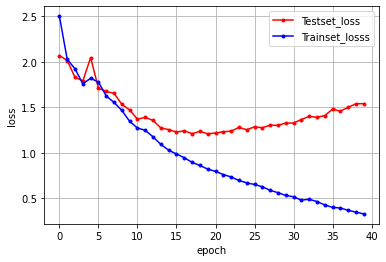

In [22]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

(X_train, Y_train),(X_test,Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

category = np.max(Y_train)+1
print(category, '카테고리')
print(len(X_train),'학습용 뉴스기사')
print(len(X_test), '테스트 뉴스기사')
print(X_train[0])

x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

# model
model = Sequential()
model.add(Embedding(5000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))


#  학습

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=100, epochs=40, validation_data=(x_test,y_test))

# 검증

print('\n Test Accuracy: %.4f' %(model.evaluate(x_test,y_test)[1]))
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker= '.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'Trainset_losss')
plt.legend(loc='upper right')
plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [25]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from keras import models, layers
from keraspp import skeras

ModuleNotFoundError: No module named 'keraspp'

In [1]:
from mod1 import *

df = select_stock('hrs','2020-01-01')
df

,Date,Code,Name,Open,High,Low,Volume,Close
0,2020-01-02,036640,HRS,2675,2675,2640,70066,2655
1,2020-01-03,036640,HRS,2655,2690,2655,75018,2680
2,2020-01-06,036640,HRS,2650,2680,2600,74714,2610
3,2020-01-07,036640,HRS,2605,2645,2605,43743,2635
4,2020-01-08,036640,HRS,2630,3025,2545,5063029,2800
...,...,...,...,...,...,...,...,...
183,2020-09-24,036640,HRS,3355,3465,3355,93589,3355
184,2020-09-25,036640,HRS,3355,3440,3240,60194,3375
185,2020-09-28,036640,HRS,3395,3480,3385,35672,3445
186,2020-09-29,036640,HRS,3450,3475,3405,25506,3470


In [2]:
df['h_o'] = df['High']-df['Open']
df

,Date,Code,Name,Open,High,Low,Volume,Close,h_o
0,2020-01-02,036640,HRS,2675,2675,2640,70066,2655,0
1,2020-01-03,036640,HRS,2655,2690,2655,75018,2680,35
2,2020-01-06,036640,HRS,2650,2680,2600,74714,2610,30
3,2020-01-07,036640,HRS,2605,2645,2605,43743,2635,40
4,2020-01-08,036640,HRS,2630,3025,2545,5063029,2800,395
...,...,...,...,...,...,...,...,...,...
183,2020-09-24,036640,HRS,3355,3465,3355,93589,3355,110
184,2020-09-25,036640,HRS,3355,3440,3240,60194,3375,85
185,2020-09-28,036640,HRS,3395,3480,3385,35672,3445,85
186,2020-09-29,036640,HRS,3450,3475,3405,25506,3470,25


In [3]:
df['h_l'] = df['High']-df['Low']
df

,Date,Code,Name,Open,High,Low,Volume,Close,h_o,h_l
0,2020-01-02,036640,HRS,2675,2675,2640,70066,2655,0,35
1,2020-01-03,036640,HRS,2655,2690,2655,75018,2680,35,35
2,2020-01-06,036640,HRS,2650,2680,2600,74714,2610,30,80
3,2020-01-07,036640,HRS,2605,2645,2605,43743,2635,40,40
4,2020-01-08,036640,HRS,2630,3025,2545,5063029,2800,395,480
...,...,...,...,...,...,...,...,...,...,...
183,2020-09-24,036640,HRS,3355,3465,3355,93589,3355,110,110
184,2020-09-25,036640,HRS,3355,3440,3240,60194,3375,85,200
185,2020-09-28,036640,HRS,3395,3480,3385,35672,3445,85,95
186,2020-09-29,036640,HRS,3450,3475,3405,25506,3470,25,70


In [4]:
df['h_c'] = df['High']-df['Close']
df

,Date,Code,Name,Open,High,Low,Volume,Close,h_o,h_l,h_c
0,2020-01-02,036640,HRS,2675,2675,2640,70066,2655,0,35,20
1,2020-01-03,036640,HRS,2655,2690,2655,75018,2680,35,35,10
2,2020-01-06,036640,HRS,2650,2680,2600,74714,2610,30,80,70
3,2020-01-07,036640,HRS,2605,2645,2605,43743,2635,40,40,10
4,2020-01-08,036640,HRS,2630,3025,2545,5063029,2800,395,480,225
...,...,...,...,...,...,...,...,...,...,...,...
183,2020-09-24,036640,HRS,3355,3465,3355,93589,3355,110,110,110
184,2020-09-25,036640,HRS,3355,3440,3240,60194,3375,85,200,65
185,2020-09-28,036640,HRS,3395,3480,3385,35672,3445,85,95,35
186,2020-09-29,036640,HRS,3450,3475,3405,25506,3470,25,70,5


In [6]:
df = df[['Date','h_o','h_l','h_c','Volume']]
df

,Date,h_o,h_l,h_c,Volume
0,2020-01-02,0,35,20,70066
1,2020-01-03,35,35,10,75018
2,2020-01-06,30,80,70,74714
3,2020-01-07,40,40,10,43743
4,2020-01-08,395,480,225,5063029
...,...,...,...,...,...
183,2020-09-24,110,110,110,93589
184,2020-09-25,85,200,65,60194
185,2020-09-28,85,95,35,35672
186,2020-09-29,25,70,5,25506



# 일봉 차트

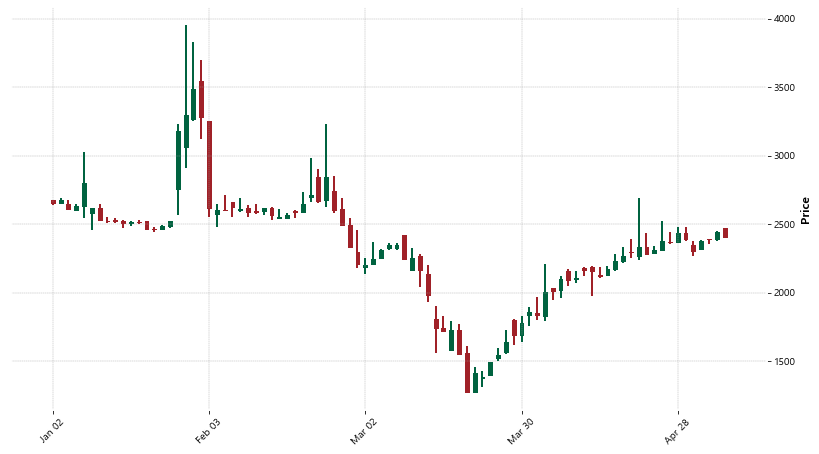

In [22]:
from mod1 import *
import matplotlib.gridspec as gridspec
import mplfinance as mpf


df = select_stock('hrs', '2020-01-01')

ohlc = df[['Date','Open', 'High', 'Low', 'Close','Volume']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc = ohlc.set_index('Date')
ohlc.index.name = 'Date'

mpf.plot(ohlc,figratio=(15,8),figscale=1.0,type='candle',style='charles')

<Figure size 432x288 with 0 Axes>

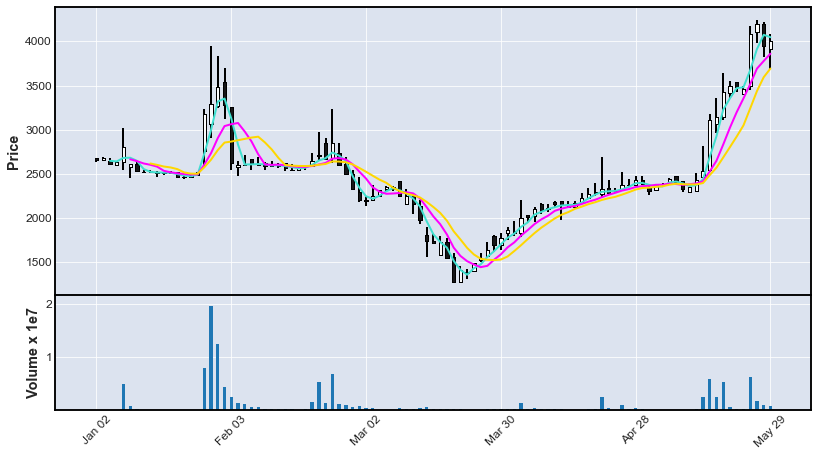

In [3]:
from mod1 import *
import matplotlib.gridspec as gridspec
import mplfinance as mpf


df = select_stock('hrs', '2020-01-01')

ohlc = df[['Date','Open', 'High', 'Low', 'Close','Volume']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc = ohlc.set_index('Date')
ohlc.index.name = 'Date'

plt.tight_layout()
mpf.plot(ohlc,figratio=(15,8),type='candle',mav=(3,6,9),volume=True)  ### 3,6,9일 이동평균선 그리고 거래량


In [1]:
from mod1 import *
import plotly.offline as offline
import plotly.graph_objs as go

df = select_stock('hrs', '2018-01-01')
olhc = df[['Date','Open','High','Low','Close']]

offline.init_notebook_mode(connected = True)

trace = go.Candlestick(x=olhc.Date, open=olhc.Open, high=olhc.High, low=olhc.Low, close = olhc.Close)
data =[trace]

layout=go.Layout(title='hrs')
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig,filename='candlestick')

# Bokeh 챠트

In [3]:
##  stock 자료 항목을 월봉, 주봉  DataFrame 으로 변환하여 Bokeh Chart그리기

from mod1 import *
def group_candle(market='kospi', start_day = '2019-01-01',period ='month'):
    df = select_market(market,start_day)
    df['Date']=pd.to_datetime(df['Date'])
    months = [g for n, g in df.groupby(pd.Grouper(key='Date',freq='M'))]  ##   월별
    weeks = [g for n, g in df.groupby(pd.Grouper(key='Date',freq='W'))]  ##   주별
    columns = ['date','open', 'high', 'low', 'close', 'volume']
    rows = []
    
    if period == 'month':
        period = months
    elif period == 'week':
        period = weeks
        
    for i in range(len(period)):
        rows.append(period[i].iloc[-1]['Date'])
        rows.append(period[i].iloc[0]["Open"])
        rows.append(max(period[i]['High']))
        rows.append(min(period[i]['Low']))
        rows.append(period[i].iloc[-1]['Close'])
        rows.append(sum(period[i]['Volume']))
        
    arr = np.array(rows)
    arr1 = arr.reshape(len(period),6)
    df = pd.DataFrame(data=arr1, columns=columns)
    df = df.set_index(df['date'])
    return df 


def bokeh_chart(market='kospi',start_day = '2019-01-01', period ='month'):
    from math import pi
    from bokeh.io import output_notebook, show
    from bokeh.plotting import figure
    from bokeh.layouts import gridplot

    output_notebook()
    
    df = group_candle(market, start_day, period)
    
    mids = (df.open + df.close)/2
    spans = abs(df.close-df.open)

    inc = df.close >= df.open
    dec = df.open > df.close

    TOOLS = "pan,wheel_zoom,box_zoom,reset,save,crosshair"

    p_candlechart = figure(x_axis_type="datetime", tools=TOOLS, plot_width=900, plot_height=200, toolbar_location="left",title = market)
    p_candlechart.xaxis.major_label_orientation = pi/4
    p_candlechart.segment(df.index[inc], df.high[inc], df.index[inc], df.low[inc], color="red")
    p_candlechart.segment(df.index[dec], df.high[dec], df.index[dec], df.low[dec], color="blue")
    p_candlechart.vbar(df.index[inc], 0.5, df.open[inc], df.close[inc], fill_color="red", line_color="red",line_width=10)
    p_candlechart.vbar(df.index[dec], 0.5, df.open[dec], df.close[dec], fill_color="blue", line_color="blue",line_width=10)

    p_volumechart = figure(x_axis_type="datetime", tools=TOOLS, plot_width=900, plot_height=200, toolbar_location="left")
    p_volumechart.vbar(df.index, 0.5, df.volume, fill_color="black", line_color="black",line_width=10)

    p = figure(tools='crosshair', plot_width=900, toolbar_location="left")
    p = gridplot([[p_candlechart], [p_volumechart]], toolbar_location='left')
    show(p)

bokeh_chart('kospi','2020-01-01','week')

Loading BokehJS ...

In [22]:
from mod1 import *
from bokeh.layouts import gridplot
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

output_notebook()

def datetime(x):
    return np.array(x, dtype=np.datetime64)

df = get_index_ohlcv_by_date("20190101", "20200528", "코스피", freq='m')
df = df.reset_index()
df.columns=['date', 'open', 'high', 'low','close','volume']
df["date"] = pd.to_datetime(df["date"])

p1 = figure(x_axis_type="datetime", title="Stock Closing Prices")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(datetime(df['date']), df['close'], color='#A6CEE3', legend_label='HRS')
p1.legend.location = "top_left"

hrs = np.array(df['close'])
hrs_dates = np.array(df['date'], dtype=np.datetime64)

window_size = 30
window = np.ones(window_size)/float(window_size)
hrs_avg = np.convolve(hrs, window, 'same')

p2 = figure(x_axis_type="datetime", title="HRS One-Month Average")
p2.grid.grid_line_alpha = 0
p2.xaxis.axis_label = 'Date'
p2.yaxis.axis_label = 'Price'
p2.ygrid.band_fill_color = "olive"
p2.ygrid.band_fill_alpha = 0.1

p2.circle(hrs_dates, hrs, size=4, legend_label='close',
          color='red', alpha=0.2)

p2.line(hrs_dates, hrs_avg, legend_label='avg', color='navy')
p2.legend.location = "top_left"

#output_file("stocks.html", title="stocks.py example")

show(gridplot([[p1,p2]], plot_width=400, plot_height=400))  # open a browser

Loading BokehJS ...

In [1]:
###  코스피 월봉(함수)

from mod1 import *

def bokeh_chart(start_day='20190101', last_day='20210528',market='코스피', freq='m' ):
    from math import pi
    from bokeh.io import output_notebook, show
    from bokeh.plotting import figure
    from bokeh.layouts import gridplot

    output_notebook()

    df = get_index_ohlcv_by_date("20190101", "20200528", "코스피", freq='m')
    df = df.reset_index()
    df.columns=['date', 'open', 'high', 'low','close','volume']
    df["date"] = pd.to_datetime(df["date"])
    df = df.set_index(df['date'])

    mids = (df.open + df.close)/2
    spans = abs(df.close-df.open)

    inc = df.close >= df.open
    dec = df.open > df.close

    TOOLS = "pan,wheel_zoom,box_zoom,reset,save,crosshair"

    p_candlechart = figure(x_axis_type="datetime", tools=TOOLS, plot_width=900, plot_height=200, toolbar_location="left")
    p_candlechart.xaxis.major_label_orientation = pi/4
    p_candlechart.segment(df.index[inc], df.high[inc], df.index[inc], df.low[inc], color="red")
    p_candlechart.segment(df.index[dec], df.high[dec], df.index[dec], df.low[dec], color="blue")
    p_candlechart.vbar(df.index[inc], 0.5, df.open[inc], df.close[inc], fill_color="red", line_color="red",line_width=30)
    p_candlechart.vbar(df.index[dec], 0.5, df.open[dec], df.close[dec], fill_color="blue", line_color="blue",line_width=30)

    p_volumechart = figure(x_axis_type="datetime", tools=TOOLS, plot_width=900, plot_height=200, toolbar_location="left")
    p_volumechart.vbar(df.index, 0.5, df.volume, fill_color="black", line_color="black",line_width=30)

    p = figure(tools='crosshair', plot_width=900, toolbar_location="left")
    p = gridplot([[p_candlechart], [p_volumechart]], toolbar_location='left')
    show(p)
bokeh_chart(market='코스닥')

Loading BokehJS ...

In [1]:
###  코스피 일봉

from mod1 import *
from math import pi
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import gridplot

output_notebook()

df = select_market('kospi','2020-01-01')
df = df[['Date', 'Open', 'High', 'Low', 'Volume', 'Close']]
df.columns=['date', 'open', 'high', 'low', 'volume','close']
df["date"] = pd.to_datetime(df["date"])

mids = (df.open + df.close)/2
spans = abs(df.close-df.open)

inc = df.close >= df.open
dec = df.open > df.close
w = 12*60*60*1000 # half day in ms

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,crosshair"

p_candlechart = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1050, plot_height=200, toolbar_location="left")
p_candlechart.xaxis.major_label_orientation = pi/4

p_candlechart.segment(df.date, df.high, df.date, df.low, color="black")
p_candlechart.rect(df.date[inc], mids[inc], w, spans[inc], fill_color="#D5E1DD", line_color="blue")
p_candlechart.rect(df.date[dec], mids[dec], w, spans[dec], fill_color="#F2583E", line_color="red")

p_volumechart = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1050, plot_height=200, toolbar_location="left")
p_volumechart.vbar(df.date, 2.0, df.volume, fill_color="black", line_color="black",line_width=3)

p = figure(tools='crosshair', plot_width=1000, toolbar_location="left")
p = gridplot([[p_candlechart], [p_volumechart]], toolbar_location='left')
show(p)

Loading BokehJS ...

In [15]:
###  개별종목 일봉

from mod1 import *
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import gridplot

output_notebook()

df = select_stock('hrs','2018-01-01')
df = df[['Date', 'Open', 'High', 'Low', 'Volume', 'Close']]
df.columns=['date', 'open', 'high', 'low', 'volume','close']
df["date"] = pd.to_datetime(df["date"])

inc = df.close >= df.open
dec = df.open > df.close

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,crosshair"

p_candlechart = figure(x_axis_type="datetime",plot_width=1050, plot_height=200, x_range=(-1, len(df)),tools=TOOLS, toolbar_location="left")
p_candlechart.segment(df.index[inc], df.high[inc], df.index[inc], df.low[inc], color="red")
p_candlechart.segment(df.index[dec], df.high[dec], df.index[dec], df.low[dec], color="blue")
p_candlechart.vbar(df.index[inc], 0.5, df.open[inc], df.close[inc], fill_color="red", line_color="red")
p_candlechart.vbar(df.index[dec], 0.5, df.open[dec], df.close[dec], fill_color="blue", line_color="blue")

p_volumechart = figure(plot_width=1050, plot_height=100, x_range=p_candlechart.x_range, tools="crosshair",toolbar_location="below")
p_volumechart.vbar(df.index, 0.5, df.volume, fill_color="black", line_color="black")

p = figure(tools='crosshair', plot_width=1000, toolbar_location="left")
p = gridplot([[p_candlechart], [p_volumechart]], toolbar_location='left')
show(p)

Loading BokehJS ...

In [12]:
from math import pi
from bokeh.io import show, output_file
from bokeh.plotting import figure

output_notebook()

df = select_stock('hrs','2018-01-01')
df = df[['Date', 'Open', 'High', 'Low', 'Volume', 'Close']]
df.columns=['date', 'open', 'high', 'low', 'volume','close']
df["date"] = pd.to_datetime(df["date"])

mids = (df.open + df.close)/2
spans = abs(df.close-df.open)

inc = df.close > df.open
dec = df.open > df.close
w = 12*60*60*1000 # half day in ms

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,crosshair"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, toolbar_location="left")

#p.title = "MSFT Candlestick"
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(df.date, df.high, df.date, df.low, color="black")
p.rect(df.date[inc], mids[inc], w, spans[inc], fill_color="#D5E1DD", line_color="blue")
p.rect(df.date[dec], mids[dec], w, spans[dec], fill_color="#F2583E", line_color="red")

#output_file("candlestick.html", title="candlestick.py example")
#p = gridplot([[p_candlechart], [p_volumechart]], toolbar_location=None)
#p = gridplot([[p_candlechart]],toolbar_location=None)
show(p)  # open a browser

Loading BokehJS ...

In [8]:
from mod1 import *
from bokeh.layouts import gridplot
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

def datetime(x):
    return np.array(x, dtype=np.datetime64)

df = select_stock('hrs','2020-01-01')
df = df[['Date', 'Open', 'High', 'Low', 'Volume', 'Close']]
df.columns=['date', 'open', 'high', 'low', 'volume','close']

p1 = figure(x_axis_type="datetime", title="Stock Closing Prices")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(datetime(df['date']), df['close'], color='#A6CEE3', legend_label='HRS')
p1.legend.location = "top_left"

hrs = np.array(df['close'])
hrs_dates = np.array(df['date'], dtype=np.datetime64)

window_size = 30
window = np.ones(window_size)/float(window_size)
hrs_avg = np.convolve(hrs, window, 'same')

p2 = figure(x_axis_type="datetime", title="HRS One-Month Average")
p2.grid.grid_line_alpha = 0
p2.xaxis.axis_label = 'Date'
p2.yaxis.axis_label = 'Price'
p2.ygrid.band_fill_color = "olive"
p2.ygrid.band_fill_alpha = 0.1

p2.circle(hrs_dates, hrs, size=4, legend_label='close',
          color='red', alpha=0.2)

p2.line(hrs_dates, hrs_avg, legend_label='avg', color='navy')
p2.legend.location = "top_left"

#output_file("stocks.html", title="stocks.py example")

show(gridplot([[p1,p2]], plot_width=400, plot_height=400))  # open a browser

In [7]:
import numpy as np

from bokeh.layouts import gridplot
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

def datetime(x):
    return np.array(x, dtype=np.datetime64)

name = '오공'
name1 = name

df = select_stock(name,'2019-01-01')
df = df[['Date', 'Open', 'High', 'Low', 'Volume', 'Close']]
df.columns=['date', 'open', 'high', 'low', 'volume','close']

p1 = figure(x_axis_type="datetime", title="Stock Closing Prices")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(datetime(df['date']), df['close'], color='#A6CEE3', legend_label=name)
p1.legend.location = "top_left"

name = np.array(df['close'])
name1_dates = np.array(df['date'], dtype=np.datetime64)

window_size = 30
window = np.ones(window_size)/float(window_size)
name1_avg = np.convolve(name, window, 'same')

p2 = figure(x_axis_type="datetime", title= name1+" One-Month Average")
p2.grid.grid_line_alpha = 0
p2.xaxis.axis_label = 'Date'
p2.yaxis.axis_label = 'Price'
p2.ygrid.band_fill_color = "olive"
p2.ygrid.band_fill_alpha = 0.1

p2.circle(name1_dates, name, size=4, legend_label='close',
          color='darkgrey', alpha=0.2)

p2.line(name1_dates, name1_avg, legend_label='avg', color='navy')
p2.legend.location = "top_right"

#output_file("stocks.html", title="stocks.py example")

show(gridplot([[p1,p2]], plot_width=400, plot_height=400))  # open a browser

# Technical-Analysis without Talib

In [ ]:
### https://www.quantopian.com/posts/technical-analysis-indicators-without-talib-code


import numpy  
import pandas as pd  
import math as m


#Moving Average  
def MA(df, n):  
    MA = pd.Series(pd.rolling_mean(df['Close'], n), name = 'MA_' + str(n))  
    df = df.join(MA)  
    return df

#Exponential Moving Average  
def EMA(df, n):  
    EMA = pd.Series(pd.ewma(df['Close'], span = n, min_periods = n - 1), name = 'EMA_' + str(n))  
    df = df.join(EMA)  
    return df

#Momentum  
def MOM(df, n):  
    M = pd.Series(df['Close'].diff(n), name = 'Momentum_' + str(n))  
    df = df.join(M)  
    return df

#Rate of Change  
def ROC(df, n):  
    M = df['Close'].diff(n - 1)  
    N = df['Close'].shift(n - 1)  
    ROC = pd.Series(M / N, name = 'ROC_' + str(n))  
    df = df.join(ROC)  
    return df

#Average True Range  
def ATR(df,n): #df is the DataFrame, n is the period 7,14 ,etc
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1)
    df['ATR']=np.nan
    df.at[n-1,'ATR']=df['TR'][:n-1].mean() #.ix is deprecated from pandas version- 0.19
    for i in range(n,len(df)):
        df['ATR'][i]=(df['ATR'][i-1]*(n-1)+ df['TR'][i])/n
    return df

#Bollinger Bands  
def BBANDS(df, n):  
    MA = pd.Series(pd.rolling_mean(df['Close'], n))  
    MSD = pd.Series(pd.rolling_std(df['Close'], n))  
    b1 = 4 * MSD / MA  
    B1 = pd.Series(b1, name = 'BollingerB_' + str(n))  
    df = df.join(B1)  
    b2 = (df['Close'] - MA + 2 * MSD) / (4 * MSD)  
    B2 = pd.Series(b2, name = 'Bollinger%b_' + str(n))  
    df = df.join(B2)  
    return df

#Pivot Points, Supports and Resistances  
def PPSR(df):  
    PP = pd.Series((df['High'] + df['Low'] + df['Close']) / 3)  
    R1 = pd.Series(2 * PP - df['Low'])  
    S1 = pd.Series(2 * PP - df['High'])  
    R2 = pd.Series(PP + df['High'] - df['Low'])  
    S2 = pd.Series(PP - df['High'] + df['Low'])  
    R3 = pd.Series(df['High'] + 2 * (PP - df['Low']))  
    S3 = pd.Series(df['Low'] - 2 * (df['High'] - PP))  
    psr = {'PP':PP, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3}  
    PSR = pd.DataFrame(psr)  
    df = df.join(PSR)  
    return df

#Stochastic oscillator %K  
def STOK(df):  
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SO%k')  
    df = df.join(SOk)  
    return df

# Stochastic Oscillator, EMA smoothing, nS = slowing (1 if no slowing)  
def STO(df,  nK, nD, nS=1):  
    SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min()) / (df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SO%k'+str(nK))  
    SOd = pd.Series(SOk.ewm(ignore_na=False, span=nD, min_periods=nD-1, adjust=True).mean(), name = 'SO%d'+str(nD))  
    SOk = SOk.ewm(ignore_na=False, span=nS, min_periods=nS-1, adjust=True).mean()  
    SOd = SOd.ewm(ignore_na=False, span=nS, min_periods=nS-1, adjust=True).mean()  
    df = df.join(SOk)  
    df = df.join(SOd)  
    return df  
# Stochastic Oscillator, SMA smoothing, nS = slowing (1 if no slowing)  
def STO(df, nK, nD,  nS=1):  
    SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min()) / (df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SO%k'+str(nK))  
    SOd = pd.Series(SOk.rolling(window=nD, center=False).mean(), name = 'SO%d'+str(nD))  
    SOk = SOk.rolling(window=nS, center=False).mean()  
    SOd = SOd.rolling(window=nS, center=False).mean()  
    df = df.join(SOk)  
    df = df.join(SOd)  
    return df  
#Trix  
def TRIX(df, n):  
    EX1 = pd.ewma(df['Close'], span = n, min_periods = n - 1)  
    EX2 = pd.ewma(EX1, span = n, min_periods = n - 1)  
    EX3 = pd.ewma(EX2, span = n, min_periods = n - 1)  
    i = 0  
    ROC_l = [0]  
    while i + 1 <= df.index[-1]:  
        ROC = (EX3[i + 1] - EX3[i]) / EX3[i]  
        ROC_l.append(ROC)  
        i = i + 1  
    Trix = pd.Series(ROC_l, name = 'Trix_' + str(n))  
    df = df.join(Trix)  
    return df

#Average Directional Movement Index  
def ADX(df, n, n_ADX):  
    i = 0  
    UpI = []  
    DoI = []  
    while i + 1 <= df.index[-1]:  
        UpMove = df.get_value(i + 1, 'High') - df.get_value(i, 'High')  
        DoMove = df.get_value(i, 'Low') - df.get_value(i + 1, 'Low')  
        if UpMove > DoMove and UpMove > 0:  
            UpD = UpMove  
        else: UpD = 0  
        UpI.append(UpD)  
        if DoMove > UpMove and DoMove > 0:  
            DoD = DoMove  
        else: DoD = 0  
        DoI.append(DoD)  
        i = i + 1  
    i = 0  
    TR_l = [0]  
    while i < df.index[-1]:  
        TR = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        TR_l.append(TR)  
        i = i + 1  
    TR_s = pd.Series(TR_l)  
    ATR = pd.Series(pd.ewma(TR_s, span = n, min_periods = n))  
    UpI = pd.Series(UpI)  
    DoI = pd.Series(DoI)  
    PosDI = pd.Series(pd.ewma(UpI, span = n, min_periods = n - 1) / ATR)  
    NegDI = pd.Series(pd.ewma(DoI, span = n, min_periods = n - 1) / ATR)  
    ADX = pd.Series(pd.ewma(abs(PosDI - NegDI) / (PosDI + NegDI), span = n_ADX, min_periods = n_ADX - 1), name = 'ADX_' + str(n) + '_' + str(n_ADX))  
    df = df.join(ADX)  
    return df

#MACD, MACD Signal and MACD difference  
def MACD(df, n_fast, n_slow):  
    EMAfast = pd.Series(pd.ewma(df['Close'], span = n_fast, min_periods = n_slow - 1))  
    EMAslow = pd.Series(pd.ewma(df['Close'], span = n_slow, min_periods = n_slow - 1))  
    MACD = pd.Series(EMAfast - EMAslow, name = 'MACD_' + str(n_fast) + '_' + str(n_slow))  
    MACDsign = pd.Series(pd.ewma(MACD, span = 9, min_periods = 8), name = 'MACDsign_' + str(n_fast) + '_' + str(n_slow))  
    MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff_' + str(n_fast) + '_' + str(n_slow))  
    df = df.join(MACD)  
    df = df.join(MACDsign)  
    df = df.join(MACDdiff)  
    return df

#Mass Index  
def MassI(df):  
    Range = df['High'] - df['Low']  
    EX1 = pd.ewma(Range, span = 9, min_periods = 8)  
    EX2 = pd.ewma(EX1, span = 9, min_periods = 8)  
    Mass = EX1 / EX2  
    MassI = pd.Series(pd.rolling_sum(Mass, 25), name = 'Mass Index')  
    df = df.join(MassI)  
    return df

#Vortex Indicator: http://www.vortexindicator.com/VFX_VORTEX.PDF  
def Vortex(df, n):  
    i = 0  
    TR = [0]  
    while i < df.index[-1]:  
        Range = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        TR.append(Range)  
        i = i + 1  
    i = 0  
    VM = [0]  
    while i < df.index[-1]:  
        Range = abs(df.get_value(i + 1, 'High') - df.get_value(i, 'Low')) - abs(df.get_value(i + 1, 'Low') - df.get_value(i, 'High'))  
        VM.append(Range)  
        i = i + 1  
    VI = pd.Series(pd.rolling_sum(pd.Series(VM), n) / pd.rolling_sum(pd.Series(TR), n), name = 'Vortex_' + str(n))  
    df = df.join(VI)  
    return df





#KST Oscillator  
def KST(df, r1, r2, r3, r4, n1, n2, n3, n4):  
    M = df['Close'].diff(r1 - 1)  
    N = df['Close'].shift(r1 - 1)  
    ROC1 = M / N  
    M = df['Close'].diff(r2 - 1)  
    N = df['Close'].shift(r2 - 1)  
    ROC2 = M / N  
    M = df['Close'].diff(r3 - 1)  
    N = df['Close'].shift(r3 - 1)  
    ROC3 = M / N  
    M = df['Close'].diff(r4 - 1)  
    N = df['Close'].shift(r4 - 1)  
    ROC4 = M / N  
    KST = pd.Series(pd.rolling_sum(ROC1, n1) + pd.rolling_sum(ROC2, n2) * 2 + pd.rolling_sum(ROC3, n3) * 3 + pd.rolling_sum(ROC4, n4) * 4, name = 'KST_' + str(r1) + '_' + str(r2) + '_' + str(r3) + '_' + str(r4) + '_' + str(n1) + '_' + str(n2) + '_' + str(n3) + '_' + str(n4))  
    df = df.join(KST)  
    return df

#Relative Strength Index  
def RSI(df, n):  
    i = 0  
    UpI = [0]  
    DoI = [0]  
    while i + 1 <= df.index[-1]:  
        UpMove = df.get_value(i + 1, 'High') - df.get_value(i, 'High')  
        DoMove = df.get_value(i, 'Low') - df.get_value(i + 1, 'Low')  
        if UpMove > DoMove and UpMove > 0:  
            UpD = UpMove  
        else: UpD = 0  
        UpI.append(UpD)  
        if DoMove > UpMove and DoMove > 0:  
            DoD = DoMove  
        else: DoD = 0  
        DoI.append(DoD)  
        i = i + 1  
    UpI = pd.Series(UpI)  
    DoI = pd.Series(DoI)  
    PosDI = pd.Series(pd.ewma(UpI, span = n, min_periods = n - 1))  
    NegDI = pd.Series(pd.ewma(DoI, span = n, min_periods = n - 1))  
    RSI = pd.Series(PosDI / (PosDI + NegDI), name = 'RSI_' + str(n))  
    df = df.join(RSI)  
    return df

#True Strength Index  
def TSI(df, r, s):  
    M = pd.Series(df['Close'].diff(1))  
    aM = abs(M)  
    EMA1 = pd.Series(pd.ewma(M, span = r, min_periods = r - 1))  
    aEMA1 = pd.Series(pd.ewma(aM, span = r, min_periods = r - 1))  
    EMA2 = pd.Series(pd.ewma(EMA1, span = s, min_periods = s - 1))  
    aEMA2 = pd.Series(pd.ewma(aEMA1, span = s, min_periods = s - 1))  
    TSI = pd.Series(EMA2 / aEMA2, name = 'TSI_' + str(r) + '_' + str(s))  
    df = df.join(TSI)  
    return df

#Accumulation/Distribution  
def ACCDIST(df, n):  
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']  
    M = ad.diff(n - 1)  
    N = ad.shift(n - 1)  
    ROC = M / N  
    AD = pd.Series(ROC, name = 'Acc/Dist_ROC_' + str(n))  
    df = df.join(AD)  
    return df

#Chaikin Oscillator  
def Chaikin(df):  
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']  
    Chaikin = pd.Series(pd.ewma(ad, span = 3, min_periods = 2) - pd.ewma(ad, span = 10, min_periods = 9), name = 'Chaikin')  
    df = df.join(Chaikin)  
    return df

#Money Flow Index and Ratio  
def MFI(df, n):  
    PP = (df['High'] + df['Low'] + df['Close']) / 3  
    i = 0  
    PosMF = [0]  
    while i < df.index[-1]:  
        if PP[i + 1] > PP[i]:  
            PosMF.append(PP[i + 1] * df.get_value(i + 1, 'Volume'))  
        else:  
            PosMF.append(0)  
        i = i + 1  
    PosMF = pd.Series(PosMF)  
    TotMF = PP * df['Volume']  
    MFR = pd.Series(PosMF / TotMF)  
    MFI = pd.Series(pd.rolling_mean(MFR, n), name = 'MFI_' + str(n))  
    df = df.join(MFI)  
    return df

#On-balance Volume  
def OBV(df, n):  
    i = 0  
    OBV = [0]  
    while i < df.index[-1]:  
        if df.get_value(i + 1, 'Close') - df.get_value(i, 'Close') > 0:  
            OBV.append(df.get_value(i + 1, 'Volume'))  
        if df.get_value(i + 1, 'Close') - df.get_value(i, 'Close') == 0:  
            OBV.append(0)  
        if df.get_value(i + 1, 'Close') - df.get_value(i, 'Close') < 0:  
            OBV.append(-df.get_value(i + 1, 'Volume'))  
        i = i + 1  
    OBV = pd.Series(OBV)  
    OBV_ma = pd.Series(pd.rolling_mean(OBV, n), name = 'OBV_' + str(n))  
    df = df.join(OBV_ma)  
    return df

#Force Index  
def FORCE(df, n):  
    F = pd.Series(df['Close'].diff(n) * df['Volume'].diff(n), name = 'Force_' + str(n))  
    df = df.join(F)  
    return df

#Ease of Movement  
def EOM(df, n):  
    EoM = (df['High'].diff(1) + df['Low'].diff(1)) * (df['High'] - df['Low']) / (2 * df['Volume'])  
    Eom_ma = pd.Series(pd.rolling_mean(EoM, n), name = 'EoM_' + str(n))  
    df = df.join(Eom_ma)  
    return df

#Commodity Channel Index  
def CCI(df, n):  
    PP = (df['High'] + df['Low'] + df['Close']) / 3  
    CCI = pd.Series((PP - pd.rolling_mean(PP, n)) / pd.rolling_std(PP, n), name = 'CCI_' + str(n))  
    df = df.join(CCI)  
    return df

#Coppock Curve  
def COPP(df, n):  
    M = df['Close'].diff(int(n * 11 / 10) - 1)  
    N = df['Close'].shift(int(n * 11 / 10) - 1)  
    ROC1 = M / N  
    M = df['Close'].diff(int(n * 14 / 10) - 1)  
    N = df['Close'].shift(int(n * 14 / 10) - 1)  
    ROC2 = M / N  
    Copp = pd.Series(pd.ewma(ROC1 + ROC2, span = n, min_periods = n), name = 'Copp_' + str(n))  
    df = df.join(Copp)  
    return df

#Keltner Channel  
def KELCH(df, n):  
    KelChM = pd.Series(pd.rolling_mean((df['High'] + df['Low'] + df['Close']) / 3, n), name = 'KelChM_' + str(n))  
    KelChU = pd.Series(pd.rolling_mean((4 * df['High'] - 2 * df['Low'] + df['Close']) / 3, n), name = 'KelChU_' + str(n))  
    KelChD = pd.Series(pd.rolling_mean((-2 * df['High'] + 4 * df['Low'] + df['Close']) / 3, n), name = 'KelChD_' + str(n))  
    df = df.join(KelChM)  
    df = df.join(KelChU)  
    df = df.join(KelChD)  
    return df

#Ultimate Oscillator  
def ULTOSC(df):  
    i = 0  
    TR_l = [0]  
    BP_l = [0]  
    while i < df.index[-1]:  
        TR = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        TR_l.append(TR)  
        BP = df.get_value(i + 1, 'Close') - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        BP_l.append(BP)  
        i = i + 1  
    UltO = pd.Series((4 * pd.rolling_sum(pd.Series(BP_l), 7) / pd.rolling_sum(pd.Series(TR_l), 7)) + (2 * pd.rolling_sum(pd.Series(BP_l), 14) / pd.rolling_sum(pd.Series(TR_l), 14)) + (pd.rolling_sum(pd.Series(BP_l), 28) / pd.rolling_sum(pd.Series(TR_l), 28)), name = 'Ultimate_Osc')  
    df = df.join(UltO)  
    return df

#Donchian Channel  
def DONCH(df, n):  
    i = 0  
    DC_l = []  
    while i < n - 1:  
        DC_l.append(0)  
        i = i + 1  
    i = 0  
    while i + n - 1 < df.index[-1]:  
        DC = max(df['High'].ix[i:i + n - 1]) - min(df['Low'].ix[i:i + n - 1])  
        DC_l.append(DC)  
        i = i + 1  
    DonCh = pd.Series(DC_l, name = 'Donchian_' + str(n))  
    DonCh = DonCh.shift(n - 1)  
    df = df.join(DonCh)  
    return df
`
#Standard Deviation  
def STDDEV(df, n):  
    df = df.join(pd.Series(pd.rolling_std(df['Close'], n), name = 'STD_' + str(n)))  
    return df  

In [ ]:
"""
Indicators as shown by Peter Bakker at:
https://www.quantopian.com/posts/technical-analysis-indicators-without-talib-code
"""

"""
25-Mar-2018: Fixed syntax to support the newest version of Pandas. Warnings should no longer appear.
             Fixed some bugs regarding min_periods and NaN.
			 If you find any bugs, please report to github.com/palmbook
"""

# Import Built-Ins
import logging

# Import Third-Party
import pandas as pd
import numpy as np

# Import Homebrew

# Init Logging Facilities
log = logging.getLogger(__name__)


def moving_average(df, n):
    """Calculate the moving average for the given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    df = df.join(MA)
    return df


def exponential_moving_average(df, n):
    """
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    df = df.join(EMA)
    return df


def momentum(df, n):
    """
    
    :param df: pandas.DataFrame 
    :param n: 
    :return: pandas.DataFrame
    """
    M = pd.Series(df['Close'].diff(n), name='Momentum_' + str(n))
    df = df.join(M)
    return df


def rate_of_change(df, n):
    """
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M / N, name='ROC_' + str(n))
    df = df.join(ROC)
    return df


def average_true_range(df, n):
    """
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    i = 0
    TR_l = [0]
    while i < df.index[-1]:
        TR = max(df.loc[i + 1, 'High'], df.loc[i, 'Close']) - min(df.loc[i + 1, 'Low'], df.loc[i, 'Close'])
        TR_l.append(TR)
        i = i + 1
    TR_s = pd.Series(TR_l)
    ATR = pd.Series(TR_s.ewm(span=n, min_periods=n).mean(), name='ATR_' + str(n))
    df = df.join(ATR)
    return df


def bollinger_bands(df, n):
    """
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean())
    MSD = pd.Series(df['Close'].rolling(n, min_periods=n).std())
    b1 = 4 * MSD / MA
    B1 = pd.Series(b1, name='BollingerB_' + str(n))
    df = df.join(B1)
    b2 = (df['Close'] - MA + 2 * MSD) / (4 * MSD)
    B2 = pd.Series(b2, name='Bollinger%b_' + str(n))
    df = df.join(B2)
    return df


def ppsr(df):
    """Calculate Pivot Points, Supports and Resistances for given data
    
    :param df: pandas.DataFrame
    :return: pandas.DataFrame
    """
    PP = pd.Series((df['High'] + df['Low'] + df['Close']) / 3)
    R1 = pd.Series(2 * PP - df['Low'])
    S1 = pd.Series(2 * PP - df['High'])
    R2 = pd.Series(PP + df['High'] - df['Low'])
    S2 = pd.Series(PP - df['High'] + df['Low'])
    R3 = pd.Series(df['High'] + 2 * (PP - df['Low']))
    S3 = pd.Series(df['Low'] - 2 * (df['High'] - PP))
    psr = {'PP': PP, 'R1': R1, 'S1': S1, 'R2': R2, 'S2': S2, 'R3': R3, 'S3': S3}
    PSR = pd.DataFrame(psr)
    df = df.join(PSR)
    return df


def stochastic_oscillator_k(df):
    """Calculate stochastic oscillator %K for given data.
    
    :param df: pandas.DataFrame
    :return: pandas.DataFrame
    """
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name='SO%k')
    df = df.join(SOk)
    return df


def stochastic_oscillator_d(df, n):
    """Calculate stochastic oscillator %D for given data.
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name='SO%k')
    SOd = pd.Series(SOk.ewm(span=n, min_periods=n).mean(), name='SO%d_' + str(n))
    df = df.join(SOd)
    return df


def trix(df, n):
    """Calculate TRIX for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    EX1 = df['Close'].ewm(span=n, min_periods=n).mean()
    EX2 = EX1.ewm(span=n, min_periods=n).mean()
    EX3 = EX2.ewm(span=n, min_periods=n).mean()
    i = 0
    ROC_l = [np.nan]
    while i + 1 <= df.index[-1]:
        ROC = (EX3[i + 1] - EX3[i]) / EX3[i]
        ROC_l.append(ROC)
        i = i + 1
    Trix = pd.Series(ROC_l, name='Trix_' + str(n))
    df = df.join(Trix)
    return df


def average_directional_movement_index(df, n, n_ADX):
    """Calculate the Average Directional Movement Index for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :param n_ADX: 
    :return: pandas.DataFrame
    """
    i = 0
    UpI = []
    DoI = []
    while i + 1 <= df.index[-1]:
        UpMove = df.loc[i + 1, 'High'] - df.loc[i, 'High']
        DoMove = df.loc[i, 'Low'] - df.loc[i + 1, 'Low']
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    i = 0
    TR_l = [0]
    while i < df.index[-1]:
        TR = max(df.loc[i + 1, 'High'], df.loc[i, 'Close']) - min(df.loc[i + 1, 'Low'], df.loc[i, 'Close'])
        TR_l.append(TR)
        i = i + 1
    TR_s = pd.Series(TR_l)
    ATR = pd.Series(TR_s.ewm(span=n, min_periods=n).mean())
    UpI = pd.Series(UpI)
    DoI = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean() / ATR)
    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean() / ATR)
    ADX = pd.Series((abs(PosDI - NegDI) / (PosDI + NegDI)).ewm(span=n_ADX, min_periods=n_ADX).mean(),
                    name='ADX_' + str(n) + '_' + str(n_ADX))
    df = df.join(ADX)
    return df


def macd(df, n_fast, n_slow):
    """Calculate MACD, MACD Signal and MACD difference
    
    :param df: pandas.DataFrame
    :param n_fast: 
    :param n_slow: 
    :return: pandas.DataFrame
    """
    EMAfast = pd.Series(df['Close'].ewm(span=n_fast, min_periods=n_slow).mean())
    EMAslow = pd.Series(df['Close'].ewm(span=n_slow, min_periods=n_slow).mean())
    MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = pd.Series(MACD.ewm(span=9, min_periods=9).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    df = df.join(MACD)
    df = df.join(MACDsign)
    df = df.join(MACDdiff)
    return df


def mass_index(df):
    """Calculate the Mass Index for given data.
    
    :param df: pandas.DataFrame
    :return: pandas.DataFrame
    """
    Range = df['High'] - df['Low']
    EX1 = Range.ewm(span=9, min_periods=9).mean()
    EX2 = EX1.ewm(span=9, min_periods=9).mean()
    Mass = EX1 / EX2
    MassI = pd.Series(Mass.rolling(25).sum(), name='Mass Index')
    df = df.join(MassI)
    return df


def vortex_indicator(df, n):
    """Calculate the Vortex Indicator for given data.
    
    Vortex Indicator described here:
        http://www.vortexindicator.com/VFX_VORTEX.PDF
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    i = 0
    TR = [0]
    while i < df.index[-1]:
        Range = max(df.loc[i + 1, 'High'], df.loc[i, 'Close']) - min(df.loc[i + 1, 'Low'], df.loc[i, 'Close'])
        TR.append(Range)
        i = i + 1
    i = 0
    VM = [0]
    while i < df.index[-1]:
        Range = abs(df.loc[i + 1, 'High'] - df.loc[i, 'Low']) - abs(df.loc[i + 1, 'Low'] - df.loc[i, 'High'])
        VM.append(Range)
        i = i + 1
    VI = pd.Series(pd.Series(VM).rolling(n).sum() / pd.Series(TR).rolling(n).sum(), name='Vortex_' + str(n))
    df = df.join(VI)
    return df


def kst_oscillator(df, r1, r2, r3, r4, n1, n2, n3, n4):
    """Calculate KST Oscillator for given data.
    
    :param df: pandas.DataFrame
    :param r1: 
    :param r2: 
    :param r3: 
    :param r4: 
    :param n1: 
    :param n2: 
    :param n3: 
    :param n4: 
    :return: pandas.DataFrame
    """
    M = df['Close'].diff(r1 - 1)
    N = df['Close'].shift(r1 - 1)
    ROC1 = M / N
    M = df['Close'].diff(r2 - 1)
    N = df['Close'].shift(r2 - 1)
    ROC2 = M / N
    M = df['Close'].diff(r3 - 1)
    N = df['Close'].shift(r3 - 1)
    ROC3 = M / N
    M = df['Close'].diff(r4 - 1)
    N = df['Close'].shift(r4 - 1)
    ROC4 = M / N
    KST = pd.Series(
        ROC1.rolling(n1).sum() + ROC2.rolling(n2).sum() * 2 + ROC3.rolling(n3).sum() * 3 + ROC4.rolling(n4).sum() * 4,
        name='KST_' + str(r1) + '_' + str(r2) + '_' + str(r3) + '_' + str(r4) + '_' + str(n1) + '_' + str(
            n2) + '_' + str(n3) + '_' + str(n4))
    df = df.join(KST)
    return df


def relative_strength_index(df, n):
    """Calculate Relative Strength Index(RSI) for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    i = 0
    UpI = [0]
    DoI = [0]
    while i + 1 <= df.index[-1]:
        UpMove = df.loc[i + 1, 'High'] - df.loc[i, 'High']
        DoMove = df.loc[i, 'Low'] - df.loc[i + 1, 'Low']
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.Series(UpI)
    DoI = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())
    RSI = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
    df = df.join(RSI)
    return df


def true_strength_index(df, r, s):
    """Calculate True Strength Index (TSI) for given data.
    
    :param df: pandas.DataFrame
    :param r: 
    :param s: 
    :return: pandas.DataFrame
    """
    M = pd.Series(df['Close'].diff(1))
    aM = abs(M)
    EMA1 = pd.Series(M.ewm(span=r, min_periods=r).mean())
    aEMA1 = pd.Series(aM.ewm(span=r, min_periods=r).mean())
    EMA2 = pd.Series(EMA1.ewm(span=s, min_periods=s).mean())
    aEMA2 = pd.Series(aEMA1.ewm(span=s, min_periods=s).mean())
    TSI = pd.Series(EMA2 / aEMA2, name='TSI_' + str(r) + '_' + str(s))
    df = df.join(TSI)
    return df


def accumulation_distribution(df, n):
    """Calculate Accumulation/Distribution for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']
    M = ad.diff(n - 1)
    N = ad.shift(n - 1)
    ROC = M / N
    AD = pd.Series(ROC, name='Acc/Dist_ROC_' + str(n))
    df = df.join(AD)
    return df


def chaikin_oscillator(df):
    """Calculate Chaikin Oscillator for given data.
    
    :param df: pandas.DataFrame
    :return: pandas.DataFrame
    """
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']
    Chaikin = pd.Series(ad.ewm(span=3, min_periods=3).mean() - ad.ewm(span=10, min_periods=10).mean(), name='Chaikin')
    df = df.join(Chaikin)
    return df


def money_flow_index(df, n):
    """Calculate Money Flow Index and Ratio for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    PP = (df['High'] + df['Low'] + df['Close']) / 3
    i = 0
    PosMF = [0]
    while i < df.index[-1]:
        if PP[i + 1] > PP[i]:
            PosMF.append(PP[i + 1] * df.loc[i + 1, 'Volume'])
        else:
            PosMF.append(0)
        i = i + 1
    PosMF = pd.Series(PosMF)
    TotMF = PP * df['Volume']
    MFR = pd.Series(PosMF / TotMF)
    MFI = pd.Series(MFR.rolling(n, min_periods=n).mean(), name='MFI_' + str(n))
    df = df.join(MFI)
    return df


def on_balance_volume(df, n):
    """Calculate On-Balance Volume for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    i = 0
    OBV = [0]
    while i < df.index[-1]:
        if df.loc[i + 1, 'Close'] - df.loc[i, 'Close'] > 0:
            OBV.append(df.loc[i + 1, 'Volume'])
        if df.loc[i + 1, 'Close'] - df.loc[i, 'Close'] == 0:
            OBV.append(0)
        if df.loc[i + 1, 'Close'] - df.loc[i, 'Close'] < 0:
            OBV.append(-df.loc[i + 1, 'Volume'])
        i = i + 1
    OBV = pd.Series(OBV)
    OBV_ma = pd.Series(OBV.rolling(n, min_periods=n).mean(), name='OBV_' + str(n))
    df = df.join(OBV_ma)
    return df


def force_index(df, n):
    """Calculate Force Index for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    F = pd.Series(df['Close'].diff(n) * df['Volume'].diff(n), name='Force_' + str(n))
    df = df.join(F)
    return df


def ease_of_movement(df, n):
    """Calculate Ease of Movement for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    EoM = (df['High'].diff(1) + df['Low'].diff(1)) * (df['High'] - df['Low']) / (2 * df['Volume'])
    Eom_ma = pd.Series(EoM.rolling(n, min_periods=n).mean(), name='EoM_' + str(n))
    df = df.join(Eom_ma)
    return df


def commodity_channel_index(df, n):
    """Calculate Commodity Channel Index for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    PP = (df['High'] + df['Low'] + df['Close']) / 3
    CCI = pd.Series((PP - PP.rolling(n, min_periods=n).mean()) / PP.rolling(n, min_periods=n).std(),
                    name='CCI_' + str(n))
    df = df.join(CCI)
    return df


def coppock_curve(df, n):
    """Calculate Coppock Curve for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    M = df['Close'].diff(int(n * 11 / 10) - 1)
    N = df['Close'].shift(int(n * 11 / 10) - 1)
    ROC1 = M / N
    M = df['Close'].diff(int(n * 14 / 10) - 1)
    N = df['Close'].shift(int(n * 14 / 10) - 1)
    ROC2 = M / N
    Copp = pd.Series((ROC1 + ROC2).ewm(span=n, min_periods=n).mean(), name='Copp_' + str(n))
    df = df.join(Copp)
    return df


def keltner_channel(df, n):
    """Calculate Keltner Channel for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    KelChM = pd.Series(((df['High'] + df['Low'] + df['Close']) / 3).rolling(n, min_periods=n).mean(),
                       name='KelChM_' + str(n))
    KelChU = pd.Series(((4 * df['High'] - 2 * df['Low'] + df['Close']) / 3).rolling(n, min_periods=n).mean(),
                       name='KelChU_' + str(n))
    KelChD = pd.Series(((-2 * df['High'] + 4 * df['Low'] + df['Close']) / 3).rolling(n, min_periods=n).mean(),
                       name='KelChD_' + str(n))
    df = df.join(KelChM)
    df = df.join(KelChU)
    df = df.join(KelChD)
    return df


def ultimate_oscillator(df):
    """Calculate Ultimate Oscillator for given data.
    
    :param df: pandas.DataFrame
    :return: pandas.DataFrame
    """
    i = 0
    TR_l = [0]
    BP_l = [0]
    while i < df.index[-1]:
        TR = max(df.loc[i + 1, 'High'], df.loc[i, 'Close']) - min(df.loc[i + 1, 'Low'], df.loc[i, 'Close'])
        TR_l.append(TR)
        BP = df.loc[i + 1, 'Close'] - min(df.loc[i + 1, 'Low'], df.loc[i, 'Close'])
        BP_l.append(BP)
        i = i + 1
    UltO = pd.Series((4 * pd.Series(BP_l).rolling(7).sum() / pd.Series(TR_l).rolling(7).sum()) + (
                2 * pd.Series(BP_l).rolling(14).sum() / pd.Series(TR_l).rolling(14).sum()) + (
                                 pd.Series(BP_l).rolling(28).sum() / pd.Series(TR_l).rolling(28).sum()),
                     name='Ultimate_Osc')
    df = df.join(UltO)
    return df


def donchian_channel(df, n):
    """Calculate donchian channel of given pandas data frame.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    i = 0
    dc_l = []
    while i < n - 1:
        dc_l.append(0)
        i += 1

    i = 0
    while i + n - 1 < df.index[-1]:
        dc = max(df['High'].ix[i:i + n - 1]) - min(df['Low'].ix[i:i + n - 1])
        dc_l.append(dc)
        i += 1

    donchian_chan = pd.Series(dc_l, name='Donchian_' + str(n))
    donchian_chan = donchian_chan.shift(n - 1)
    return df.join(donchian_chan)


def standard_deviation(df, n):
    """Calculate Standard Deviation for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    df = df.join(pd.Series(df['Close'].rolling(n, min_periods=n).std(), name='STD_' + str(n)))
    return df